# Exercise: Sensitivity Analysis of a Two-Layer Atmosphere Model

Learning objectives of this exercise:
- Get a basic idea of the physics behind the temperature profiles of the atmosphere
- Get familiar with a simple atmospheric model, understand model parameters and model sensitivity
- Modify your code, such that it considers also climate change.

---

## Introduction

Understanding the impact of key parameters on climate models is crucial for gaining insights into Earth's energy balance. In this exercise, we will conduct a sensitivity analysis on a simplified two-layer atmosphere model implemented in Python, the original R code, visualisations and physical background are taken from this website: https://biocycle.atmos.colostate.edu/shiny/2layer/. The model calculates the planetary energy budget, considering the influence of emissivity and albedo on the temperature distribution and outgoing longwave radiation.

## Variables

1. **Emissivity of the Lower Atmosphere $\varepsilon_1$:** Represents the efficiency of the lower atmosphere in emitting thermal radiation.

2. **Emissivity of the Upper Atmosphere $\varepsilon_2$:** Indicates the efficiency of the upper atmosphere in emitting thermal radiation.

3. **Albedo $\alpha$:** Reflectivity of the planet's surface, representing the fraction of incoming solar radiation that is reflected back into space.

## Python Model

The provided Python function, `planetary_energy_budget`, calculates the surface and atmospheric temperatures, as well as the outgoing longwave radiation based on the given input parameters. The model utilizes a transfer matrix and solves the planetary energy budget equations to determine the temperatures at the surface and in each atmospheric layer.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def planetary_energy_budget(solar=1366.0, albedo=0.3, eps1=0.5, eps2=0.5, Hs=50.0, HL=50.0):
    # solar   Solar constant at top of atmosphere (W/m^2)
    # albedo  Shortwave albedo of planet ()
    # eps1    Emissivity of lower atmosphere ()
    # eps2    Emissivity of upper atmosphere ()
    # Hs      Convective heat flux from surface to lower atmosphere (W/m^2)
    # HL      Convective heat flux from lower to upper atmosphere (W/m^2)

    sigma = 5.67e-8  # Stefan-Boltzmann constant (W m^-2 K^-4)

    # Post-albedo solar power to heat the surface
    S = solar / 4 * (1 - albedo)

    # Transfer matrix contains the energy budget coefficients for surface and each layer
    transfer = np.array([[-1., eps1, (1. - eps1) * eps2],
                         [eps1, -2. * eps1, eps1 * eps2],
                         [(1. - eps1) * eps2, eps1 * eps2, -2. * eps2]])

    # Right-hand-side vector in the energy budget equations
    rhs = np.array([(Hs - S) / sigma, (HL - Hs) / sigma, -HL / sigma])

    # Solve planetary energy budget
    # by inverting transfer matrix and multiplying by vector from right-hand-side
    temps4 = np.linalg.solve(transfer, rhs)

    # Extract temperatures by taking the fourth root of each element of the solution vector
    Ts = temps4[0] ** 0.25
    T1 = temps4[1] ** 0.25
    T2 = temps4[2] ** 0.25

    # Compute outgoing longwave radiation (OLR) at top of atmosphere (TOA)
    olr = sigma * (Ts ** 4 * (1 - eps1) * (1 - eps2) + eps1 * T1 ** 4 * (1 - eps2) + eps2 * T2 ** 4)

    # Return all the needed information to the calling function
    return {
        'Tsfc': Ts,
        'Tlower': T1,
        'Tupper': T2,
        'outgoing_longwave': olr,
        'solar': solar,
        'albedo': albedo,
        'solar_absorbed': S,
        'emissivity_lower': eps1,
        'emissivity_upper': eps2,
        'convec_surface': Hs,
        'convec_lower': HL,
        'emission_surface': sigma * Ts ** 4,
        'emission_lower': eps1 * sigma * T1 ** 4,
        'emission_upper': eps2 * sigma * T2 ** 4
    }

# Example usage:
result = planetary_energy_budget()
print(result)

{'Tsfc': 279.9812612843617, 'Tlower': 250.25328911690582, 'Tupper': 241.44858464566627, 'outgoing_longwave': 239.05, 'solar': 1366.0, 'albedo': 0.3, 'solar_absorbed': 239.04999999999998, 'emissivity_lower': 0.5, 'emissivity_upper': 0.5, 'convec_surface': 50.0, 'convec_lower': 50.0, 'emission_surface': 348.41666666666674, 'emission_lower': 111.19166666666668, 'emission_upper': 96.35}


The goal of this exercise is to explore the sensitivity of the model to variations in emissivity and albedo. By systematically varying these parameters, we aim to observe how changes in emissivity and albedo influence surface and atmospheric temperatures. Feel free to reduce the complexity of the model, by setting $\epsilon_2$ to 1. 

### 1. Plotting the atmospheric temperature profile for default values

In [3]:
# define y axis: atmospheric layers
atm_levels = ["surface", "lower", "upper"]
# extract temperature data from results for each layer into a list
atm_temp = [result['Tlower'], result['Tsfc'], result['Tupper']]

In [4]:
# create informative label from the information saved in the dictionary
# check out modulo (=%) string formatting: https://www.geeksforgeeks.org/string-formatting-in-python-using/
lbl = "albedo=%s, e1=%s, e2=%s" % (result['albedo'],result['emissivity_lower'], result['emissivity_upper'])
print(lbl)

albedo=0.3, e1=0.5, e2=0.5


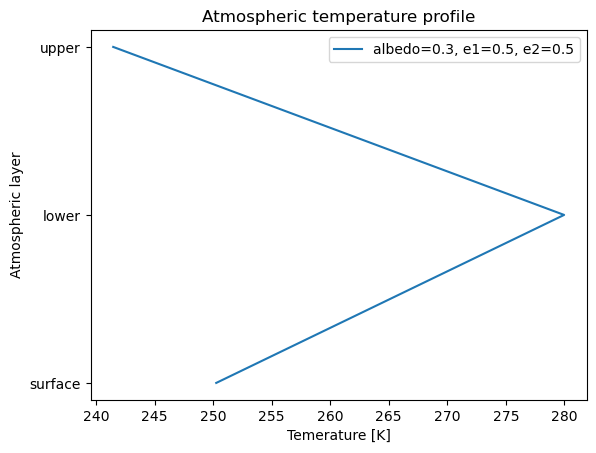

In [5]:
# plot
plt.ylabel('Atmospheric layer')
plt.xlabel('Temerature [K]')
plt.title('Atmospheric temperature profile')

plt.plot(atm_temp, atm_levels, 
         label = lbl)

plt.legend()

**BONUS:** find out how to do dictionary subsetting with comprehension:
https://www.geeksforgeeks.org/get-a-subset-of-dict-in-python/

Describe briefly why it is useful to use dictionaries in python
(https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

The dictionaries are a data structure that allows us to store information in pairs of key-values, useful for lookups, intiuitive, and with a long extension. 

**BONUS:** Write a function for plotting several profiles! 

*(hint: input to the function can be a list of result dictionaries, and you can plot them with a foor loop)*

In [25]:
def plot_atmospheric_profiles(profiles):

    atm_levels = ["surface", "lower", "upper"]
    
    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.ylabel('Atmospheric layer')
    plt.xlabel('Temperature [K]')
    plt.title('Atmospheric Temperature Profiles')
    
    # Plot each profile
    for result in profiles:
        # Extract temperature data
        atm_temp = [result['Tsfc'], result['Tlower'], result['Tupper']]
        
        # Create an informative label
        lbl = "albedo=%s, e1=%s, e2=%s" % (result['albedo'], 
                                           result['emissivity_lower'], 
                                           result['emissivity_upper'])
        
        plt.plot(atm_temp, atm_levels, label=lbl)
    
    # Add a legend
    plt.legend()
    plt.gca()
    plt.grid()
    plt.show()



In [26]:

albedos = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]
profile = []
for albedo in albedos:
    profile.append(planetary_energy_budget(solar=1366.0, albedo=albedo, eps1=0.5, eps2=0.5, Hs=50.0, HL=50.0))

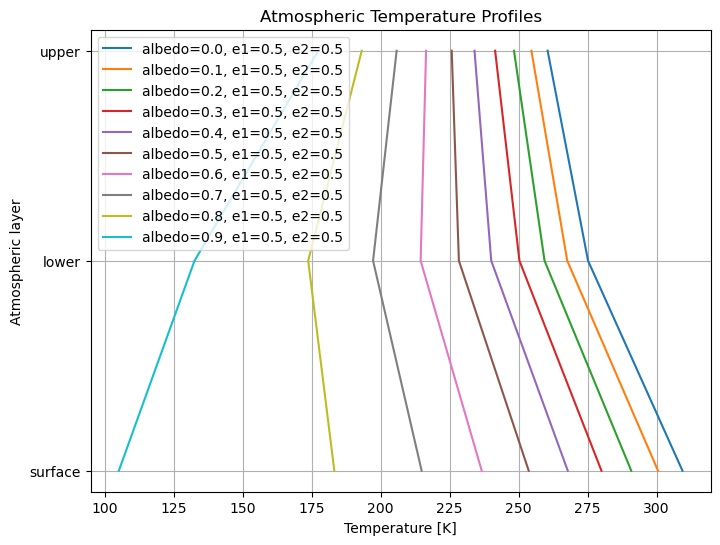

In [27]:
plot_atmospheric_profiles(profile)


### 1. Explore the model sensitivity to changes in albedo
#### What are the effects of higher/lower albedo on surface temperature and atmospheric temperature?

**TODO**: Use different values of albedo and plot the temperature profiles


**High albedo:** the planet is colder... This means that more sunlight energy scapes from the planet and there is less energy available to be absorbed by the planet. We can see in the figure, the line with color light blue shows the lowest energy energy on surface but on the upper tends to be higher due the effect acumulative there "when is scaping this energy".

**Low albedo:** implies a planet warm. In the figure, the line darck blue represent the highest albedo from the graph and this also shows the highest temperature on surface.

### 2. Explore the model sensitivity to changes in emissivity
#### What are the effects of higher/lower emissivity on surface temperature and atmospheric temperature?

**TODO**: Use different values of `eps1` and `eps2` (separately) and plot the temperature profiles

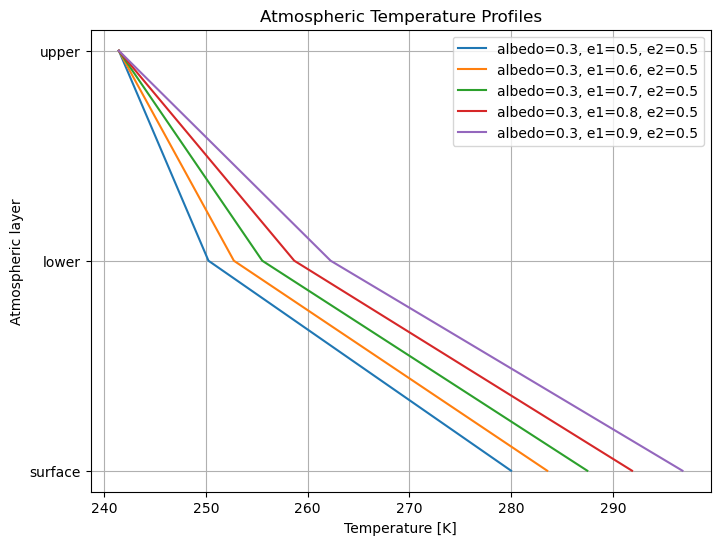

In [30]:
eps1s = [0.5,0.6,0.7, 0.8, 0.9]
profile = []
for eps1 in eps1s:
    profile.append(planetary_energy_budget(solar=1366.0, albedo=0.3, eps1=eps1, eps2=0.5, Hs=50.0, HL=50.0))
plot_atmospheric_profiles(profile)

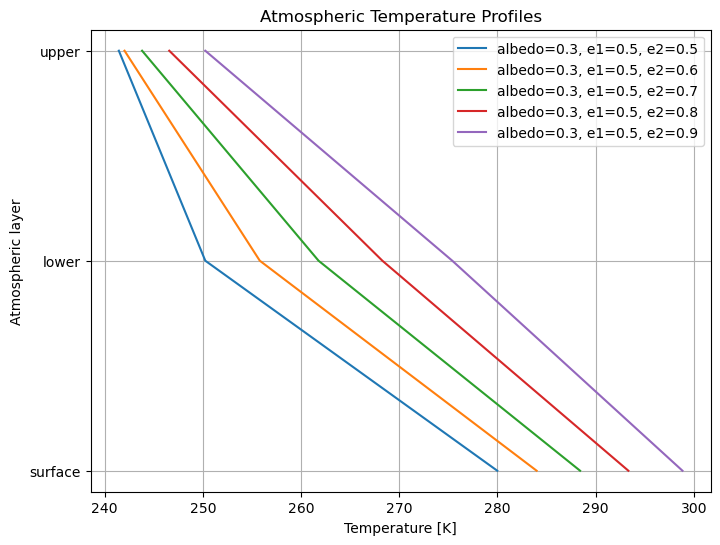

In [32]:
eps2s = [0.5,0.6,0.7, 0.8, 0.9]
profile = []
for eps2 in eps2s:
    profile.append(planetary_energy_budget(solar=1366.0, albedo=0.3, eps1=0.5, eps2=eps2, Hs=50.0, HL=50.0))
plot_atmospheric_profiles(profile)

### 3. Questions

**Question:** What do the results show, how are the temperature profile affected by the different parameters?

*For changes in Sp1 and Sp2, the temperature increments when increments any of the parammeters*


**Question:** From the lecture, remember how (and where) increased CO2 changes the compostion and temperature profile of the atmosphere. In this model, which parameter can best reflect the effect of climate change on the atmospheric temperature profile and why?

In this model, **albedo** and **emissivity parameters (\( e_1 \) and \( e_2 \))** are the most relevant parameters to reflect the effects of climate change on the atmospheric temperature profile:

- **Albedo**:  directly impacts the amount of solar energy reflected back into space. Changes in albedo can represent significant climate feedback mechanisms, such as: melting ice and snow, Land use changes**: Urbanization and deforestation can reduce surface albedo, influencing local and global climate, cloud cover changes.

- **Emissivity (\( e_1 \) and \( e_2 \))**: determines how effectively the atmosphere emits infrared radiation. Changes in emissivity reflect alterations in the atmospheric composition, from: greenhouse gases (e.g., \( \text{CO}_2, \text{CH}_4 \)), and aerosols and pollutants.

- **Solar Constant (\( S \))**: while is not directly related to anthropogenic climate change, variations in the solar constant can simulate changes in solar output. It's not that relevant as human-induced climate change but could be included.


*Source*:
- Class slides,
- 
